# **Bank Marketing Campaign Prediction**



## **Library**

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier   

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, auc, precision_recall_curve, average_precision_score

# Hindari pemotongan saat print
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# supress warning
import warnings 
warnings.filterwarnings('ignore')

## **1. Business Understanding and Problem Framing**


Dataset ini merupakan dataset dari suatu bank untuk produk *Term Deposit* atau deposito berjangka, dimana Bank X melakukan berbagai kampanye pemasaran untuk mempromosikan produk deposito berjangka. Namun, tingkat keberhasilan dari kampanye pemasaran ini cukup rendah sementara terdapat biaya yang dikeluarkan untuk pelaksanaannya. Untuk meningkatkan efisiensi dan efektivitas kampanye, perlu dilakukan analisis terhadap karakteristik nasabah yang **berpotensi menerima penawaran produk**. 

Saya sebagai seorang data analis di Bank X dibutuhkan untuk membantu team marketing mengidentifikasi nasabah yang memiliki potensi berlangganan produk *Term Deposit*.

**Permasalahan bisnis** : Bagaimana bank X dapat memprediksi nasabah yang kemungkinan besar akan berlangganan produk deposito berjangka setelah kampanye pemasaran dilakukan?

**Goal** : 
- Meningkatkan tingkat konversi nasabah pada kampanye pemasaran dengan menargetkan nasabah yang lebih potensial berdasarkan data historis.

- Membuat model machine learning yang dapat melakukan prediksi apakah seorang nasabah akan berlangganan produk deposito berjangka atau tidak berdasarkan dataset bank X yang telah diberikan.

- Memberikan informasi kepada tim marketing bank X, untuk mengoptimalkan strategi dan efisiensi kampannye pemasaran produk

**Prediksi nasabah yang berlangganan atau tidak produk deposito berjangka**

Target column : `deposit`
- `yes` : nasabah berlangganan produk deposito
- `no` : nasabah tidak berlangganan produk deposito


**Metrics Evaluation**

-  🔴 **False Negative (FN)**: Model memprediksi **tidak tertarik** padahal aslinya **tertarik**.
    - Bank kehilangan kesempatan menjual produk kepada nasabah yang seharusnya bisa dikonversi.
    - Implikasi: Potensi pendapatan hilang karena strategi kampanye tidak menyasar target yang tepat.

- 🔵 **False Positive (FP)**: Model memprediksi **tertarik** padahal aslinya **tidak tertarik**.
    - Bank menghabiskan biaya promosi untuk nasabah yang tidak akan merespon.
    - Implikasi: Biaya operasional meningkat tanpa hasil.

- ⚖️ **Pemilihan Metrik Evaluasi**:
    - Precision penting untuk **menghindari FP** (menargetkan nasabah yang salah).
    - Recall penting untuk **menghindari FN** (tidak melewatkan nasabah potensial).
    - Oleh karena itu, **F1 Score** dipilih karena menyeimbangkan Precision dan Recall.

**Asumsi Finansial**

Dataset tidak memberikan informasi eksplisit yang dapat menentukan berapa total biaya yang dikeluarkan untuk melakukan marketing kepada seorang nasabah.
Maka dari itu total biaya yang dikeluarkan untuk setiap marketing yang dilakukan perlu diasumsikan. 

## **2. Data Understanding**

Dataset ini didapatkan dari : [Bank Marketing Campaign](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit)

In [2]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


**Deskripsi Kolom**

| Nama Kolom | Tipe Data | Deskripsi                                                                 |
|------------|-----------|---------------------------------------------------------------------------|
| age        | int64     | Usia nasabah                                                              |
| job        | object    | Jenis pekerjaan nasabah                                                   |
| balance    | int64     | Saldo rata-rata tahunan dalam rekening                                   |
| housing    | object    | Status pinjaman perumahan (yes/no)                                       |
| loan       | object    | Status pinjaman pribadi (yes/no)                                         |
| contact    | object    | Jenis kontak komunikasi terakhir (misalnya: cellular, telephone)         |
| month      | object    | Bulan saat terakhir kali dihubungi                                       |
| campaign   | int64     | Jumlah kontak yang dilakukan selama kampanye pemasaran                   |
| pdays      | int64     | Hari sejak nasabah terakhir kali dihubungi (999 berarti belum pernah)    |
| poutcome   | object    | Hasil dari kampanye pemasaran sebelumnya (misalnya: success, failure)     |
| deposit    | object    | Apakah nasabah berlangganan deposito berjangka? (yes/no)                 |


➡️ Kolom `deposit`  adalah label yang akan diprediksi dan kolom lain merupakan fitur yang digunakan untuk memprediksi label.

In [3]:
df['deposit'].value_counts(normalize= True)

deposit
no     0.522335
yes    0.477665
Name: proportion, dtype: float64

➡️ Dari pengecekan proporsi dapat diketahui bahwa data target `deposit` menunjukan nasabah yang melakukan deposit sebanyak 47% dengan nasabah yang tidak melakukan deposit sebanyak 52%. 

In [4]:
# encode deposit menjadi numerik
df['deposit'] = np.where(df['deposit'] == 'yes', 1, 0)
df['deposit'].value_counts(normalize=True)

deposit
0    0.522335
1    0.477665
Name: proportion, dtype: float64

- yes = berlangganan deposito 
- no = tidak berlangganan deposit

➡️ Proporsi dari data target belum termasuk data yang imbalance. 

In [6]:
df.describe()

,age,balance,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550,0.477665
std,11.919710,3089.291831,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


**Interpretasi Statistik Deskriptif Dataset**

1. `age` (Usia)
    - **mean** : 41.26 tahun
    - **rentang usia** : 18 hingga 95 tahun
    - Distribusi:
        - 25% data berusia <= 32 tahun 
        - 50% data berusia 39 tahun
        - 70% data berusia <= 49 tahun
    - Mayoritas nasabah berada pada usia produktif (30-50 tahun), meskipun terdapat beberapa nasabah lanjut usia 

2. `balance` (Saldo di bank)
    - **mean** : 1.512
    - **rentang nilai**  : -6.847 hingga 66.653
    - Distribusi :
        - 25% nasabah memiliki saldo <= 127 
        - 50% (median) nasabah memiliki saldo 549
        - 75% nasabah memiliki saldo <=  1.684
    - Sebagian besar nasabah memiliki saldo yang rendah tetapi ada sebagian kecil dengan saldo sangat besar

3. `campaign` (Jumlah kontak selama kampanye)
    - **mean** : 2.52 kontak
    - **rentang** : 1 hingga 63 kali
    - Distribusi:
        - 50% (median) dihubungi sejumlah 2 kali
        - 75% nasabah dihubungi maksimal 3 kali
        - Outlier: Kontak sebanyak 63 kali menunjukkan potensi nilai ekstrem yang perlu ditinjau.
    - Sebagian besar pelanggan hanya dihubungi 1–3 kali selama kampanye marketing.

4. `pdays` (Hari sejak terakhir dihubungi dalam kampanye sebelumnya)
    - **mean** : 51 hari
    - **nilai minimum**: -1 (berarti belum pernah dihubungi sebelumnya)
    - Distribusi:
        - 25%, 50%, 75% semuanya bernilai -1
    - Sebagian besar pelanggan belum pernah dihubungi dalam kampanye sebelumnya. Nilai positif (hingga 854 hari) menunjukkan sebagian kecil pelanggan pernah dihubungi sebelumnya, tetapi waktunya sangat bervariasi.

5.  `deposit` (Target: apakah membuka deposito berjangka?)
    - **tipe data**: Biner (0 = Tidak, 1 = Ya)
    - **mean**: 0.4777 → sekitar 47.8% pelanggan membuka deposito, dan 52.2% tidak.
    - Tidak ada ketimpangan kelas yang signifikan (data relatif seimbang), jadi tidak diperlukan penanganan imbalance pada target.

## **3. Data Cleansing**

### Missing Value & Duplicate Data

In [7]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

➡️ Tidak terdapat missing value pada data

In [8]:
df.duplicated().sum()

8

In [9]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1


➡️ Terdapat 8 data duplikat. Data duplikat dipertahankan karena data tersebut berupa data yang mencerminkan interaksi dengan pelanggan yang sah (seperti menerima telepon layanan marketing lebih dari sekali) sehingga data duplikat **tidak dihapus** karena dianggap merupakan bagian dari perilaku pelanggan yang sebenarnya.  

## **4. Exploratory Data Analysis**

### Proporsi Value Kolom Kategorikal

In [10]:
# Cek nilai unik untuk tiap kolom kategorikal, kecuali CustomerID
categorical_columns = df.select_dtypes(include=['object', 'category'])

for col in categorical_columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts(dropna=False))
    print("="*40)

Kolom: job
job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64
Kolom: housing
housing
no     4140
yes    3673
Name: count, dtype: int64
Kolom: loan
loan
no     6789
yes    1024
Name: count, dtype: int64
Kolom: contact
contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64
Kolom: month
month
may    1976
aug    1085
jul    1050
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: count, dtype: int64
Kolom: poutcome
poutcome
unknown    5819
failure     848
success     761
other       385
Name: count, dtype: int64


➡️ 
- Terdapat 54 value *unknown* pada kolom `job` 
- Terdapat 1639 value *unknown* pada kolom `contact`
- Terdapat 5819 value *unknown* pada kolom `poutcome`

In [11]:
#Melihat value pada pdays berdasarkan poutcome
display(df.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    92        14
           181       14
           91        13
           342       13
           182       12
                   ... 
success    651        1
           771        1
unknown   -1       5817
           98         1
           188        1
Name: count, Length: 742, dtype: int64

➡️ Fitur `poutcome` menunjukan hasil dari kampanye pemasaran sebelumnya. Sebagian besar nasabah dengan `pdays` = *-1* memilki value `poutcome` = *unknown* ini dapat diartikan nasabah tersebut tidak dihubungi untuk hasil kampanye sebelumnya. 

Terdapat pula nasabah dengan `pdays` dengan value positif dan `poutcome` value = *unknown*. Hal tersebut dapat terjadi akibat kesalahan pencatatan sehingga saya akan mengganti nilai pada `poutcome` = *unknown*  dengan *other* mengartikan nasabah sudah dihubungi namun tidak ada respon. 

In [5]:
df['poutcome'] = np.where((df['poutcome'] == 'unknown') & (df['pdays']> 0 ), 'other', df['poutcome'])

In [6]:
#Melihat value pada pdays berdasarkan poutcome setelah diubah
display(df.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    92        14
           181       14
           91        13
           342       13
           182       12
                   ... 
success    472        1
           541        1
           651        1
           771        1
unknown   -1       5817
Name: count, Length: 740, dtype: int64

➡️ Data yang memiliki 'pdays' dengan value positif dan 'poutcome' = '*unknown*, diubah value 'poutcome'nya menjadi *other*. 

### Analisis Distribusi

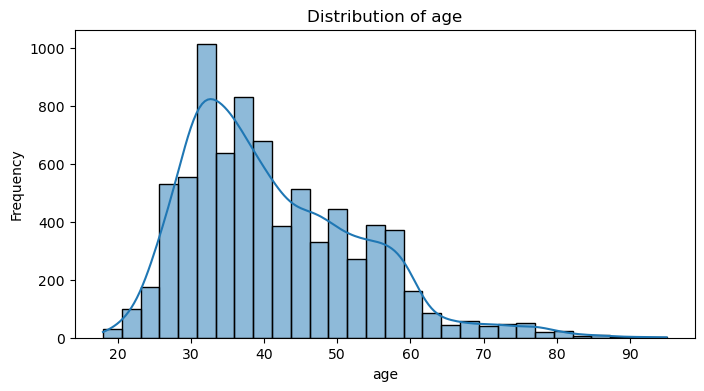

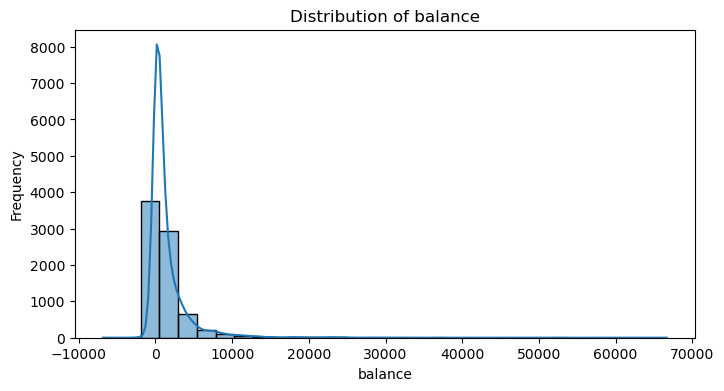

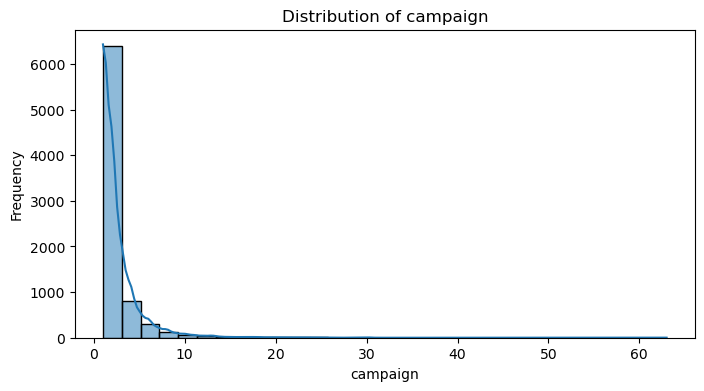

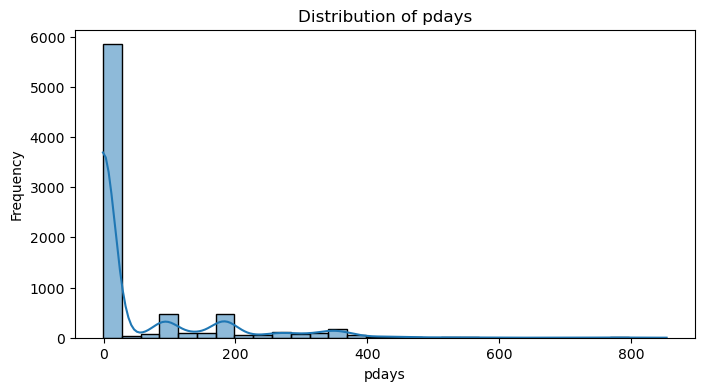

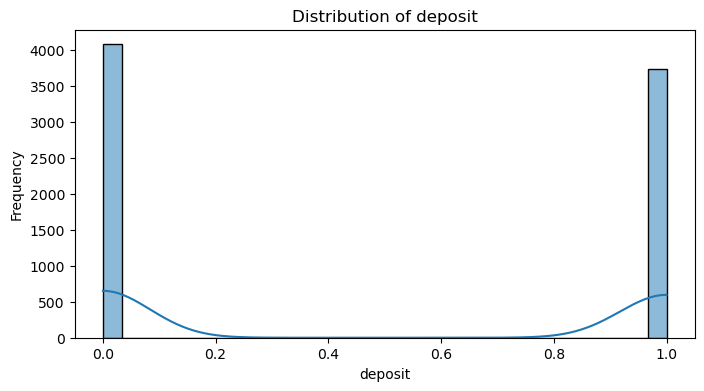

In [14]:
# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Interpretasi Distribusi Data Numerik**
1. `age`
    - Distribusi usia tidak merata dan cenderung miring ke kanan (right-skewed)
    - Mayoritas nasabah berusia muda hingga menengah atau usia produktif, sementara nasabah usia lanjut (>60 tahun) relatif sedikit
    - `age` memiliki distribusi yang tidak normal, sehingga  untuk digunakan dalam model prediktif berbasis linear atau statistik, transformasi atau pembentukan bins (kelompok usia) dapat dilakukan

2. `balance`
    - Distribusi saldo tidak merata, sebagian besar nilai saldo berada di kisaran rendah dan miring ke kanan (right-skewed)
    - Mayoritas nasabah memiliki saldo rendah sementara hanya sebagian kecil yang memiliki saldo sangat tinggi

3. `campaign` 
    - Distribusi nasabah dihubungi sangat right-skewed 
    - Mayoritas nasabah dihubungi 1 hingga 3 kali saja. Semakin sedikit jumlah kontak semakin besar jumlah nasabahnya

4. `pdays`
    - Mayoritas data pada -1, yang berarti mayoritas nasabah belum pernah dihubungi sebelumnya
    - Distribusi nasabah dihubungi tidak merata, sangat right-skewed dengan banyak nilai kecil dan beberapa outlier besar
    - Distribusi ini menunjukkan bahwa sebagian kecil pelanggan yang pernah dihubungi sebelumnya memiliki jeda waktu kontak yang sangat lama, yang bisa memengaruhi keputusan mereka.

5. `deposit`
    - Nilai 0 mendominasi, yang berarti lebih banyak nasabah tidak melakukan deposit setelah kampanye. Nilai 1 juga cukup besar, namun lebih sedikit dibandingkan kelas 0

### Deteksi Outlier 

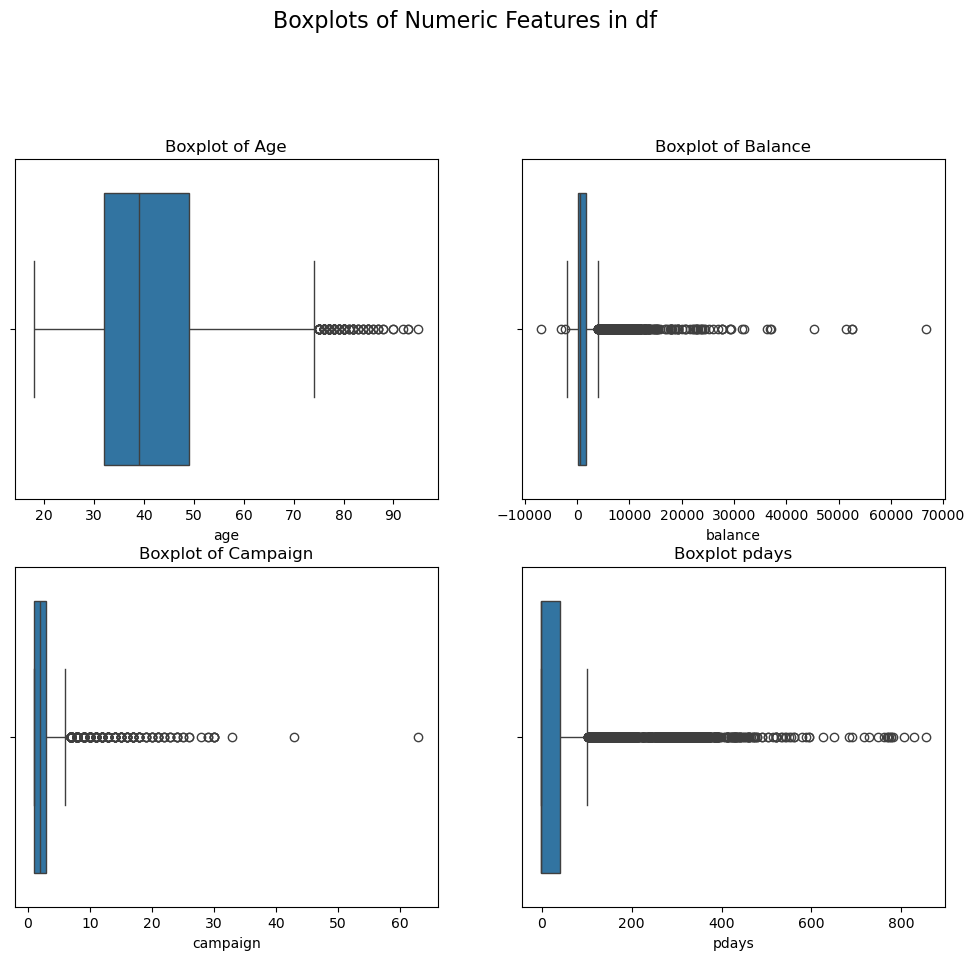

In [15]:
#Boxplot data numeric pada df
plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
sns.boxplot(df["age"], orient='h')
plt.title("Boxplot of Age")

plt.subplot(3,2,2)
sns.boxplot(df["balance"], orient='h')
plt.title("Boxplot of Balance")

plt.subplot(3,2,3)
sns.boxplot(df["campaign"], orient='h')
plt.title("Boxplot of Campaign")

plt.subplot(3,2,4)
sns.boxplot(df["pdays"], orient='h')
plt.title("Boxplot pdays")

plt.suptitle("Boxplots of Numeric Features in df", fontsize=16)

plt.show()

➡️ Semua fitur numerik terdapat outlier, terutama untuk `balance`, `campaign`, dan `pdays` 
Namun Outlier dipertahankan karena data outlier masih masuk akal untuk digunakan

### Analisis Korelasi 

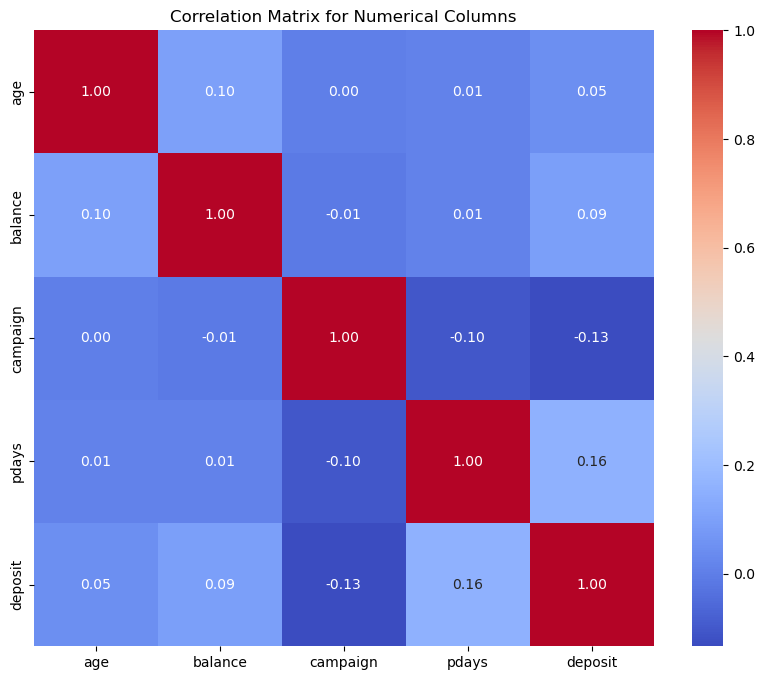

In [16]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

**Interpretasi Heatmap**

Korelasi antar variabel numerik terhadap **`deposit`** (target: nasabah berlangganan atau tidak)

1. `pdays` (+0.16)
    - Korelasi terkuat terhadap deposit di antara fitur numerik.
    - Menunjukkan **efektivitas kampanye sebelumnya**: jika nasabah dihubungi sebelumnya dan masih segar dalam ingatan mereka, mereka **lebih mungkin berlangganan**.

2. `campaign` (-0.13)
    - Korelasi negatif: semakin sering nasabah dihubungi dalam kampanye ini, semakin kecil kemungkinan mereka berlangganan
    - Bisa menunjukkan efek **over-contacting atau fatigue**.

3. `balance` (+0.09)
    - Korelasi lemah tapi logis: nasabah dengan saldo tinggi lebih mampu dan mungkin tertarik pada produk deposito.

4. `age` (+0.05)
    - Korelasi sangat lemah: usia bukan penentu utama ketertarikan terhadap deposito.

**Kesimpulan**

- Fitur numerik **tidak memiliki korelasi kuat dengan target**, artinya prediksi keberhasilan kampanye lebih mungkin ditentukan oleh **fitur kategorikal atau interaksi antar fitur**.
- Tetapi `pdays` dan `balance` merupakan fitur yang bisa dimanfaatkan untuk penyusunan strategi pemasaran yang lebih efisien.

## **5. Data Preprocessing**

In [17]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


### Binning

Binning adalah teknik untuk mengubah data numerik menjadi data kategorikal dengan membaginya ke dalam beberapa interval. Binning dilakukan pada data numerik dengan rentang nilai yang lebar agar lebih mudah dianalisis atau digunakan dalam model ML tertentu.

Binning `age` -> membagi usia berdasarkan fase kehidupan atau kelompok demografis yang bisa mencerminkan perilaku keuangan

| Kelompok Usia      | Rentang Usia |
| ------------------ | ------------ |
| Teen / Young Adult | < 25         |
| Young Adult        | 25 - 34      |
| Adult              | 35 - 44      |
| Middle Aged        | 45 - 54      |
| Senior             | 55 - 64      |
| Elderly            | ≥ 65         |

age_group
Youth           197
Young Adult    2520
Adult          2388
Middle Aged    1521
Senior          880
Elderly         307
Name: count, dtype: int64

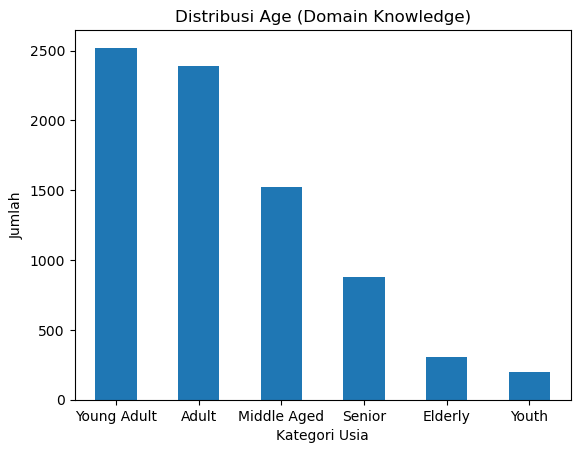

In [7]:
# Membuat bin berdasarkan fase kehidupan
bins = [0, 24, 34, 44, 54, 64, float('inf')]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly']

# Menambahkan kolom baru dengan hasil binning
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Tampilkan distribusi setiap kelompok usia
display(df['age_group'].value_counts().sort_index())

df['age_group'].value_counts().plot(kind='bar', title='Distribusi Age (Domain Knowledge)', rot= 0)
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.show()


In [8]:
df.groupby('age_group')['age'].unique().apply(sorted)

age_group
Youth                                                                                              [18, 19, 20, 21, 22, 23, 24]
Young Adult                                                                            [25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Adult                                                                                  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Middle Aged                                                                            [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
Senior                                                                                 [55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Elderly        [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95]
Name: age, dtype: object

In [20]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,age_group
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,Senior
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,Adult
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,Middle Aged
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,Adult
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,Adult


### Define X dan y

In [9]:
X = df.drop(columns= ['deposit', 'age'])

y = df['deposit']

### Train test split

Dataset dibagi menjadi data train 80% dan data test 20% dimana data test berfungsi untuk mengevaluasi performa model sedangkan data train berfungsi untuk melatih model. 

In [22]:
X.head()

,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,age_group
0,admin.,1662,no,no,cellular,jun,2,-1,unknown,Senior
1,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,Adult
2,admin.,3025,no,no,cellular,may,1,352,other,Middle Aged
3,services,-87,yes,no,cellular,may,1,-1,unknown,Adult
4,housemaid,205,yes,no,telephone,nov,4,-1,unknown,Adult


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 random_state=0,
                 test_size=0.2,
                 stratify=y)

### Scaling dan Encoding
- Scaling --> Robust Scaler
    - `balance`
    - `campaign`
    - `pdays`
- Encoding
    + Onehot Encoding --> `job`, `housing`, `loan`, `contact`, `poutcome`
    + Ordinal Encoding --> `age_group`

In [11]:
# Preprocessing pipeline
num_robust = ['balance', 'campaign', 'pdays']
cat_onehot = ['job', 'housing', 'loan','contact','month', 'poutcome']
cat_ordinal = ['age_group']

In [12]:
transformer = ColumnTransformer([
    ('scaling', RobustScaler(), num_robust),
    ('onehot', OneHotEncoder(drop= 'first'), cat_onehot),
    ('ordinal', OrdinalEncoder([['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly']]), cat_ordinal),
], remainder= 'passthrough')

## **6. Cross Validation**

Model Benchmark

In [13]:
# define model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# ensemble various
voting = VotingClassifier(estimators=[('clf1', logreg),
                                      ('clf2', knn),
                                      ('clf3', tree)])   # base learner

stacking = StackingClassifier(estimators=[('clf1', logreg),
                                      ('clf2', knn),
                                      ('clf3', tree)])

# ensemble similar
bagging = BaggingClassifier(random_state=42, estimator=KNeighborsClassifier(), n_estimators=100)
rf = RandomForestClassifier(random_state=42) # bagging
adaboost = AdaBoostClassifier(random_state=42) # boosting
gboost = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [14]:
list_model = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost, xgboost]
list_all_score = []
list_mean_score = [] # rata-rata skor
list_std = [] # std, serendah mungkin biar konsisten

for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross val
    crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'f1') # f1 score

    # f1 score
    list_all_score.append(crossval.round(2))
    list_mean_score.append(crossval.mean())
    list_std.append(crossval.std())

In [15]:
df_f1_score = pd.DataFrame()
df_f1_score['algo'] = list_model
df_f1_score['all_score'] = list_all_score
df_f1_score['mean_score'] = list_mean_score
df_f1_score['std_score'] = list_std

df_f1_score

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=42),"[0.66, 0.62, 0.65, 0.66, 0.68]",0.653376,0.018382
1,KNeighborsClassifier(),"[0.64, 0.65, 0.65, 0.63, 0.65]",0.646500,0.008714
2,DecisionTreeClassifier(random_state=42),"[0.61, 0.61, 0.62, 0.63, 0.63]",0.619641,0.009507
3,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=42)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=42))])","[0.66, 0.65, 0.67, 0.66, 0.68]",0.663979,0.011418
4,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=42)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=42))])","[0.68, 0.65, 0.66, 0.68, 0.69]",0.672836,0.015511
5,"BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,\n random_state=42)","[0.64, 0.66, 0.66, 0.64, 0.66]",0.653605,0.010348
6,RandomForestClassifier(random_state=42),"[0.66, 0.67, 0.66, 0.66, 0.7]",0.670088,0.016377
7,AdaBoostClassifier(random_state=42),"[0.66, 0.64, 0.65, 0.67, 0.69]",0.661781,0.015151
8,GradientBoostingClassifier(random_state=42),"[0.67, 0.66, 0.66, 0.67, 0.71]",0.674959,0.018333
9,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n feature_weights=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=None,\n n_jobs=None, num_parallel_tree=None, ...)","[0.65, 0.66, 0.67, 0.65, 0.7]",0.667103,0.019284


➡️ Model dengan mean_score diatas 65% ada LogisticRegression(), VotingClassifier(), StackingClassifier(), BaggingClassifier(), RandomForestClassifier(), AdaboostClassifier(), GradientBoostingClassifier(), dan XGBClassfier(). Model dengan mean_score terbaik adalah model *GradientBoostingClassifier()* dengan nilai 67%. 

## **7. Cross validation (resampling)**

untuk mencari model dengan resampling terbaik

In [16]:
smote = SMOTE(sampling_strategy= 'minority', random_state=42)
randomOver = RandomOverSampler(sampling_strategy= 'minority', random_state= 42)
randomUnder = RandomUnderSampler(sampling_strategy= 'majority', random_state= 42)
nm = NearMiss(sampling_strategy='majority')

In [17]:
# List 
list_model = [logreg, voting, stacking, bagging, rf, adaboost, gboost, xgboost]
list_model_name = ['Logistic Regression', 'Voting', 'Stacking', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
list_resampler = [smote, randomOver, randomUnder, nm]
list_resampler_name = ['SMOTE', 'RandomOver', 'RandomUnder', 'NearMiss']

# Inisialisasi penampung hasil
results = []

for resampler, resample_name in zip(list_resampler, list_resampler_name):
    for model, model_name in zip(list_model, list_model_name):
        # pipeline
        pipe_prep_model =  Pipeline([
            ('preprocessing', transformer),
            ('resampling', resampler),
            ('modeling', model)
        ])

        # cross val
        crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'recall')
        
        results.append({
            'model': model_name,
            'resampler': resample_name,
            'scores': crossval.round(2),
            'mean': crossval.mean(),
            'std': crossval.std()})


In [18]:
# Convert results to DataFrame
df_f1_resam = pd.DataFrame(results).sort_values(by= 'mean', ascending= False)
df_f1_resam

,model,resampler,scores,mean,std
28,Random Forest,NearMiss,"[0.65, 0.68, 0.66, 0.67, 0.71]",0.674037,0.021855
20,Random Forest,RandomUnder,"[0.65, 0.67, 0.65, 0.66, 0.69]",0.663652,0.015257
23,XGBoost,RandomUnder,"[0.64, 0.68, 0.65, 0.66, 0.68]",0.661307,0.014847
10,Stacking,RandomOver,"[0.65, 0.64, 0.65, 0.65, 0.69]",0.657286,0.018306
18,Stacking,RandomUnder,"[0.66, 0.62, 0.65, 0.65, 0.69]",0.653936,0.021362
3,Bagging,SMOTE,"[0.66, 0.64, 0.66, 0.61, 0.68]",0.651256,0.022657
2,Stacking,SMOTE,"[0.64, 0.63, 0.64, 0.65, 0.69]",0.650586,0.018790
4,Random Forest,SMOTE,"[0.64, 0.65, 0.64, 0.64, 0.69]",0.650586,0.018850
1,Voting,SMOTE,"[0.65, 0.63, 0.65, 0.63, 0.69]",0.649581,0.020986
12,Random Forest,RandomOver,"[0.63, 0.65, 0.64, 0.63, 0.7]",0.649581,0.025588


➡️ Model terbaik dengan resampling adalah model Randomforestclassifier dengan resampler nearmiss yang menghasilkan mean score sebesar 67%. Model ini akan hypertuning sehingga didapatkan model yang baik untuk memprediksi nasabah yang akan melakukan deposit.

## **8. Hyperparameter Tuning**


Tuning untuk model terbaik yaitu model RandomForestClassifier dengan resampler nearmiss

In [19]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', nm),
        ('modeling', rf)
    ])

# hyperparam random forest
hyperparam_rf = {
    'modeling__n_estimators': range(50,160,50),
    'modeling__max_features': range(1,3),
    'modeling__max_depth': range(2,20,2),
    'modeling__min_samples_split': range(2,10),
    'modeling__min_samples_leaf': range(1,10)
}
# randomsearch
randomsearchRF = RandomizedSearchCV(
    estimator = pipe_prep_model,
    cv = 5,
    n_jobs = -1,
    param_distributions= hyperparam_rf,
    scoring = 'f1',
    n_iter= 10,
    verbose= 1,
    random_state= 42
)


In [20]:
randomsearchRF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling',
                                                                               RobustScaler(),
                                                                               ['balance',
                                                                                'campaign',
                                                                                'pdays']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(verbose=[['Youth',
                                                                                                        'Young '
                                                                                                        'Adult',
                                                                                                        'Adult',
                                                                                                        'Middle '
                                                                                                        '...
                                              NearMiss(sampling_strategy='majority')),
                                             ('modeling',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 20, 2),
                                        'modeling__max_features': range(1, 3),
                                        'modeling__min_samples_leaf': range(1, 10),
                                        'modeling__min_samples_split': range(2, 10),
                                        'modeling__n_estimators': range(50, 160, 50)},
                   random_state=42, scoring='f1', verbose=1)

In [21]:
randomsearchRF.best_params_

{'modeling__n_estimators': 100,
 'modeling__min_samples_split': 3,
 'modeling__min_samples_leaf': 5,
 'modeling__max_features': 2,
 'modeling__max_depth': 18}

In [22]:
randomsearchRF.best_score_

0.6726138274849768

## **9. Predict to Test**

### Before Hypertuning

In [23]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', nm),
        ('modeling', rf)
    ])

# fit
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_prep_model.predict(X_test)

# f1
f1_score(y_test, y_pred_before)

0.6707566462167689

### After Hypertuning

In [24]:
# best model
best_modelnm = randomsearchRF.best_estimator_

# fit
best_modelnm.fit(X_train, y_train)

# predict
y_pred_after = best_modelnm.predict(X_test)

# f1
f1_score(y_test, y_pred_after)

0.6796256299496041

In [25]:
print('Nearmiss : RandomForestClassifier Before Tuning')
print(classification_report(y_test, y_pred_before))

Nearmiss : RandomForestClassifier Before Tuning
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       816
           1       0.68      0.66      0.67       747

    accuracy                           0.69      1563
   macro avg       0.69      0.69      0.69      1563
weighted avg       0.69      0.69      0.69      1563



In [26]:
print('Nearmiss : RandomForestClassifier After Tuning')
print(classification_report(y_test, y_pred_after))

Nearmiss : RandomForestClassifier After Tuning
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       816
           1       0.74      0.63      0.68       747

    accuracy                           0.72      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.72      0.72      0.71      1563



In [ ]:
# pred to train nm
# best model after
best_model = randomsearchRF.best_estimator_

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_train = best_model.predict(X_train)

# f1
f1_score(y_train, y_pred_train)

0.7072039942938659

In [28]:
df_score_tuning = pd.DataFrame()
df_score_tuning['model'] = ['NM Train', 'NM Test Before Tuning', 'NM Test After Tuning']
df_score_tuning['f1_score'] = [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_before), f1_score(y_test, y_pred_after)]
df_score_tuning['recall'] = [recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_before), recall_score(y_test, y_pred_after)]
df_score_tuning['precision'] = [precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_before), precision_score(y_test, y_pred_after)]
df_score_tuning['accuracy'] = [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_before), accuracy_score(y_test, y_pred_after)]
df_score_tuning['roc_auc'] = [roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_before), roc_auc_score(y_test, y_pred_after)]    
df_score_tuning

,model,f1_score,recall,precision,accuracy,roc_auc
0,NM Train,0.707204,0.664322,0.756005,0.737280,0.734152
1,NM Test Before Tuning,0.670757,0.658635,0.683333,0.690979,0.689611
2,NM Test After Tuning,0.679626,0.631861,0.735202,0.715291,0.711764


➡️ Hasil model setelah tuning memiliki nilai train 70% dan test setelah tuning sebesar 67%. Selisih performa sudah cukup baik tidak menunjukkan overfitting di mana model belajar terlalu bagus dari data training tapi kurang generalisasi ke data test walaupun hasil dari test masih kurang baik.

Untuk meningkatkan F1 Score, ROC curve dan AUC curve akan dilihat.

### **ROC Curve dan PR Curve**

Area Under ROC Curve (AUC): 0.8031


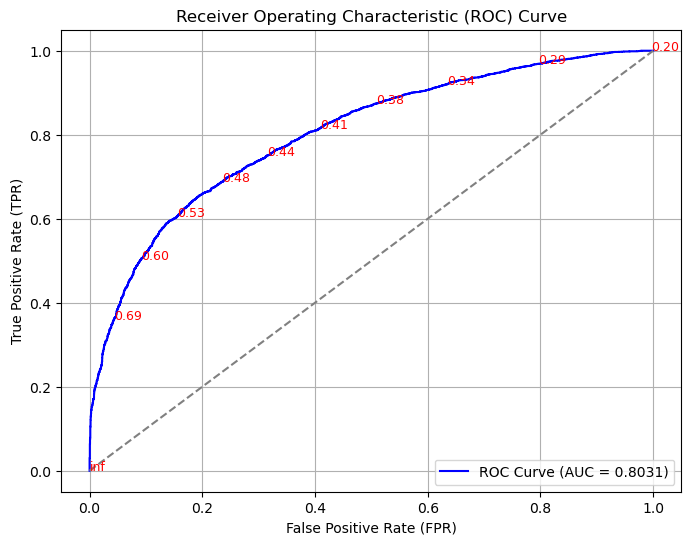

In [104]:
# Mendapatkan probabilitas prediksi untuk kelas positif (1)
y_prob = best_modelnm.predict_proba(X)[:, 1]

# Menghitung AUC
auc_score = roc_auc_score(y, y_prob)
print(f"Area Under ROC Curve (AUC): {auc_score:.4f}")

# Menghitung False Positive Rate dan True Positive Rate
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)

# Menambahkan threshold pada plot
for i in range(0, len(thresholds), len(thresholds)//10):  # Plot threshold markers
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='red')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

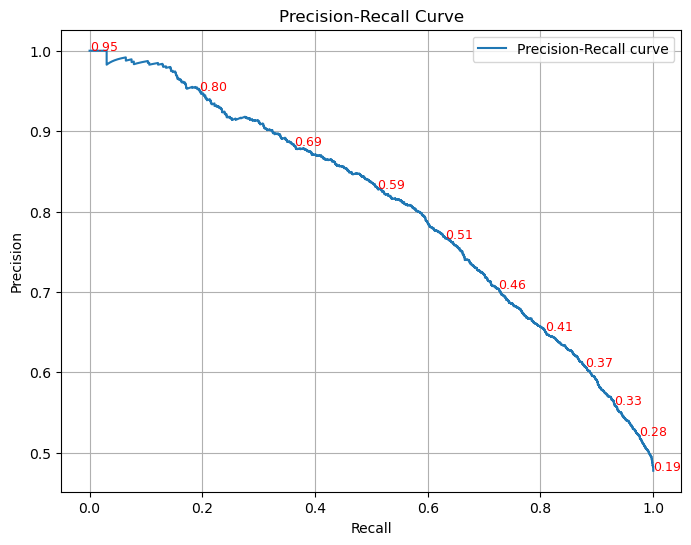

Precision-Recall AUC: 0.8050


In [105]:
# Mendapatkan probabilitas prediksi untuk kelas positif (1)
y_prob = best_modelnm.predict_proba(X)[:, 1]

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Menambahkan threshold pada plot
for i in range(0, len(thresholds), len(thresholds)//10):  # Plot threshold markers
    plt.text(recall[i], precision[i], f'{thresholds[i]:.2f}', fontsize=9, color='red')

plt.legend(loc='best')
plt.grid(True)
plt.show()

# AUC untuk Precision-Recall
pr_auc = average_precision_score(y, y_prob)
print(f'Precision-Recall AUC: {pr_auc:.4f}')

**Interpretasi AUC: ROC Curve vs. PR Curve**

**AUC ROC (Receiver Operating Characteristic)**

ROC Curve menilai kemampuan model membedakan antar kelas dengan membandingkan **True Positive Rate (Recall)** dan **False Positive Rate**. Cocok untuk data yang **seimbang**.

| AUC ROC Score | Interpretasi                            |
|---------------|------------------------------------------|
| 0.5           | ⚠️ Sama seperti nebak acak               |
| 0.7 – 0.8     | 🟡 Model cukup baik                      |
| 0.8 – 0.9     | ✅ Model sangat baik                     |
| > 0.9         | 🔥 Model hampir sempurna memisahkan kelas|

---

**AUC PR (Precision-Recall Curve)**

PR Curve lebih cocok untuk **imbalanced dataset** karena fokus pada **kelas positif**, dengan menilai keseimbangan antara **precision** dan **recall**.

| AUC PR Score  | Interpretasi                                               |
|---------------|-------------------------------------------------------------|
| ≤ 0.5         | ⚠️ Sama seperti tebak acak (kelas positif susah dikenali)  |
| 0.6 – 0.7     | 🟡 Model mulai bisa deteksi kelas positif                   |
| 0.7 – 0.8     | ✅ Sudah cukup baik dan usable                              |
| 0.8 – 0.9     | 🟢 Sangat bagus, balance precision & recall                 |
| > 0.9         | 🔥 Sangat akurat mendeteksi kelas positif                   |

---

**Interpretasi Hasil ROC dan PR Curve**

➡️
- Area Under ROC Curve (AUC): 0.8031
- Precision-Recall AUC: 0.8050

Kedua nilai tersebut sudah menunjukan bahwa model sudah baik untuk digunakan


## **10. Hasil Akhir**

### Classification Report

In [160]:
# Classification report without threshold
print("\n=== Classification Report without Threshold ===")
print(classification_report(y_test, y_pred_after))


=== Classification Report without Threshold ===
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       816
           1       0.74      0.63      0.68       747

    accuracy                           0.72      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.72      0.72      0.71      1563



In [159]:
# Adjusting the threshold to 0.4
threshold = 0.4
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Classification report with the adjusted threshold
print("\n=== Classification Report with Threshold 0.4 ===")
print(classification_report(y, y_pred_adjusted, digits=3))


=== Classification Report with Threshold 0.4 ===
              precision    recall  f1-score   support

           0      0.789     0.565     0.658      4081
           1      0.637     0.834     0.722      3732

    accuracy                          0.694      7813
   macro avg      0.713     0.700     0.690      7813
weighted avg      0.716     0.694     0.689      7813



### Confusion Matrix

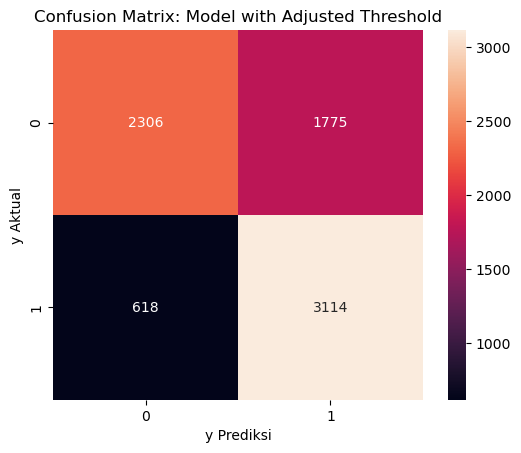

In [178]:
sns.heatmap(confusion_matrix(y, y_pred_adjusted), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Confusion Matrix: Model with Adjusted Threshold')
plt.show();

**Interpretasi confusion matrix**

**📌 Arti False Positive (FP) dan False Negative (FN)**

* **False Positive (1.775)**: Model memprediksi **nasabah tertarik**, padahal **tidak tertarik**

  * Bank **salah menargetkan** nasabah yang sebenarnya tidak akan berlangganan.
  * Implikasi: **Biaya kampanye terbuang**, seperti tenaga sales, panggilan telepon, email, atau promosi.

* **False Negative (618)**: Model memprediksi **nasabah tidak tertarik**, padahal **sebenarnya tertarik**

  * Bank **gagal mendeteksi calon nasabah potensial**.
  * Implikasi: **Kehilangan peluang penjualan**, nasabah potensial tidak dikontak dan tidak dikonversi.


**💸 Estimasi Kerugian Finansial**

- Asumsi:
  - **Kerugian 1 FN** = Rp **5.000.000** (potensi pendapatan dari satu nasabah yang tertarik tapi tidak ditindaklanjuti)
  - **Biaya 1 FP** = Rp **500.000** (biaya kampanye per nasabah yang tidak tertarik)

- Hitung Total Kerugian:
  - `Total_FN_Loss` = 618 × 5.000.000 = **Rp 3.090.000.000**
  - `Total_FP_Loss` = 1.775 × 500.000 = **Rp 887.500.000**
 

> 💰 **Total Kerugian** = Rp 887.500.000 + Rp 3.090.000.000

> 👉 **Total = Rp 3.977.500.000**


## **11. Save Model Final with threshold**

In [211]:
import pickle

# Adjusting the threshold to 0.4
threshold = 0.4
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Classification report with the adjusted threshold
print("\n=== Classification Report with Threshold 0.4 ===")
print(classification_report(y, y_pred_adjusted, digits=3))

# Save the adjusted model, threshold, and the classification report using pickle
with open('model_final_with_threshold_0.4.pkl', 'wb') as f:
    pickle.dump(best_modelnm, f)  # Save the model
    pickle.dump(threshold, f)   # Save the threshold

print("Model and threshold saved successfully.")



=== Classification Report with Threshold 0.4 ===
              precision    recall  f1-score   support

           0      0.789     0.565     0.658      4081
           1      0.637     0.834     0.722      3732

    accuracy                          0.694      7813
   macro avg      0.713     0.700     0.690      7813
weighted avg      0.716     0.694     0.689      7813

Model and threshold saved successfully.


In [212]:
# To load model and threshold
with open('model_final_with_threshold_0.4.pkl', 'rb') as f:
    loaded_model = pickle.load(f)  # Load the model
    loaded_threshold = pickle.load(f)  # Load the threshold

## **12. Model Interpretation**

### **Feature importances**

Untuk melihat fitur mana yang penting dalam model

In [213]:
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(verbose=[['Youth',
                                                                           'Young '
                                                                           'Adult',
                                                                           'Adult',
                                                                           'Middle '
                                                                           'Aged',
                                                                           'Senior',
                                                                           'Elderly']]),
                                                  ['age_group'])])),
                ('resampling', NearMiss(sampling_strategy='majority')),
                ('modeling',
                 RandomForestClassifier(max_depth=18, max_features=2,
                                        min_samples_leaf=5, min_samples_split=3,
                                        random_state=42))])

In [224]:
best_modelnm

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(verbose=[['Youth',
                                                                           'Young '
                                                                           'Adult',
                                                                           'Adult',
                                                                           'Middle '
                                                                           'Aged',
                                                                           'Senior',
                                                                           'Elderly']]),
                                                  ['age_group'])])),
                ('resampling', NearMiss(sampling_strategy='majority')),
                ('modeling',
                 RandomForestClassifier(max_depth=18, max_features=2,
                                        min_samples_leaf=5, min_samples_split=3,
                                        random_state=42))])

In [225]:
best_modelnm.named_steps['modeling'].feature_importances_

array([0.13647794, 0.04232078, 0.10735261, 0.01292213, 0.00314101,
       0.0027224 , 0.00745372, 0.01506896, 0.0027247 , 0.00509852,
       0.01278274, 0.00535512, 0.00411252, 0.00129742, 0.0667716 ,
       0.02467066, 0.00579383, 0.1259111 , 0.01562263, 0.00614317,
       0.00546314, 0.00533016, 0.01462879, 0.01814108, 0.02889548,
       0.03881198, 0.01020528, 0.01755914, 0.01925252, 0.00599488,
       0.11338098, 0.07331883, 0.04527417])

In [226]:
transformer.transformers_

[('scaling', RobustScaler(), ['balance', 'campaign', 'pdays']),
 ('onehot',
  OneHotEncoder(drop='first'),
  ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
 ('ordinal',
  OrdinalEncoder(cols=['age_group'],
                 mapping=[{'col': 'age_group',
                           'data_type': CategoricalDtype(categories=['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Senior',
                    'Elderly'],
  , ordered=True, categories_dtype=object),
                           'mapping': Youth          1
  Young Adult    2
  Adult          3
  Middle Aged    4
  Senior         5
  Elderly        6
  NaN           -2
  dtype: int64}],
                 verbose=[['Youth', 'Young Adult', 'Adult', 'Middle Aged',
                           'Senior', 'Elderly']]),
  ['age_group'])]

In [227]:
scaling_cols = list(transformer.transformers_[0][1].get_feature_names_out())
onehot_cols = list(transformer.transformers_[1][1].get_feature_names_out())
ordinal_cols = list(transformer.transformers_[2][1].get_feature_names_out())

In [229]:
fimportance = pd.DataFrame()
fimportance['Feature'] = scaling_cols + onehot_cols + ordinal_cols
fimportance['Importance'] = best_modelnm.named_steps['modeling'].feature_importances_
fimportance = fimportance.sort_values(by='Importance', ascending= False)
fimportance = fimportance.reset_index(drop= True)
fimportance

,Feature,Importance
0,balance,0.136478
1,contact_unknown,0.125911
2,poutcome_success,0.113381
3,pdays,0.107353
4,poutcome_unknown,0.073319
5,housing_yes,0.066772
6,age_group,0.045274
7,campaign,0.042321
8,month_may,0.038812
9,month_mar,0.028895


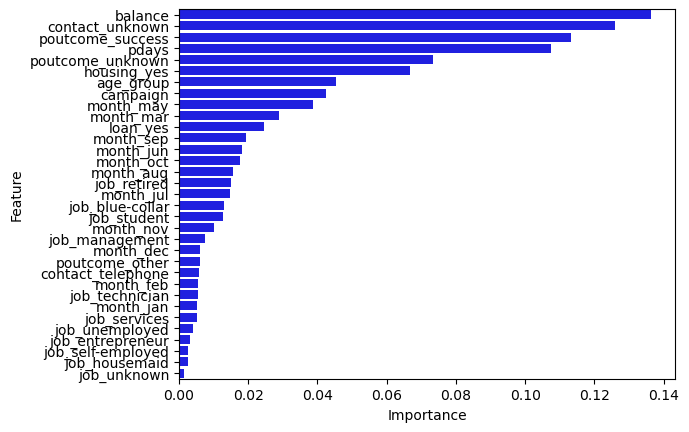

In [230]:
sns.barplot(data=fimportance, y='Feature', x='Importance', color='b');


#### 📊 Interpretasi Setiap Fitur

* `balance` : (\~13.6%)

  * Fitur paling berpengaruh dalam model.
  * Semakin tinggi saldo, kemungkinan untuk term keputusannya (misal: subscribe produk) lebih besar.
  * 🔍 Insight bisnis: Fokus pada nasabah dengan saldo tinggi untuk penawaran produk finansial.

* `contact_unknown` : (\~12.5%)

  * Metode kontak yang tidak diketahui sangat memengaruhi hasil.
  * 🔍 Insight bisnis: Perlu ditelusuri apakah data yang tidak lengkap ini menunjukkan segmen nasabah khusus atau masalah kualitas data.

* `poutcome_success` : (\~11.6%)

  * Nasabah yang sebelumnya sukses dalam kampanye memiliki kecenderungan lebih tinggi untuk merespons positif.
  * 🔍 Insight bisnis: Target ulang nasabah dengan riwayat keberhasilan kampanye.

* `pdays` : (\~10.6%)

  * Jumlah hari sejak terakhir dihubungi berpengaruh besar.
  * 🔍 Insight bisnis: Menjaga frekuensi kontak optimal bisa meningkatkan keberhasilan kampanye.

* `poutcome_unknown` : (\~7.0%)

  * Nasabah dengan outcome kampanye sebelumnya yang tidak diketahui tetap memiliki pengaruh cukup besar.
  * 🔍 Insight bisnis: Meskipun datanya tidak lengkap, tetap terdapat sinyal penting dari kelompok ini.

* `housing_yes` : (\~6.5%)

  * Kepemilikan rumah berpengaruh dalam pengambilan keputusan.
  * 🔍 Insight bisnis: Nasabah pemilik rumah bisa menjadi target untuk produk tambahan seperti asuransi properti atau pinjaman renovasi.

* `age_group` : (\~5.5%)

  * Usia tetap berperan penting, meskipun bukan yang tertinggi.
  * 🔍 Insight bisnis: Segmentasi berdasarkan usia bisa membantu kampanye lebih terarah.

* `campaign` : (\~4.6%)

  * Jumlah kontak dalam kampanye saat ini juga memberi kontribusi.
  * 🔍 Insight bisnis: Waspadai kelelahan kampanye; terlalu sering menghubungi bisa kontra-produktif.

* `month_may`, `month_mar`, `month_jan`, dst : (\~4% ke bawah masing-masing)

  * Waktu dalam setahun memengaruhi keberhasilan kampanye.
  * 🔍 Insight bisnis: Pertimbangkan waktu peluncuran kampanye — bulan Mei dan Maret terlihat lebih berdampak.

* `loan_yes`, `job_*`, `education_*`, `contact_telephone`, `month_feb`, `month_dec`, dst : (< 3%)

  * Memiliki pengaruh rendah terhadap hasil model.
  * 🔍 Insight bisnis: Fitur-fitur ini bisa tetap digunakan sebagai pelengkap, namun bukan prioritas dalam pengambilan keputusan.



## **13. Kesimpulan dan Rekomendasi**

**1. Performa Model Machine Learning**

Model machine learning yang telah dibuat sudah dapat memprediksi nasabah akan berlangganan term deposit/tidak berlangganan. Model yang dibuat adalah model RandomForestClassifier dengan NearMiss untuk resamplingnya. Performa model ML dibuat mencapai F1 Score setelah hyperparameter tuning sebesar 68% dan setelah melakukan mengubah threshold menjadi 0.4 mencapai F1 Score sebesar 72%. 

**2. Dampak Finansial dari Kesalahan Prediksi (Setelah Tuning)**

Sebelum menggunakan model ML, dapat diasumsikan bahwa tidak ada prediksi yang dilakukan untuk mengetahui apakah nasabah akan berlangganan atau tidak. Hal ini berarti semua nasabah bank yang berpotensi untuk berlangganan tidak bisa diidentifikasi sebelumnya

Tanpa Model
- Semua nasabah yang deposit (label = 1) akan False Negatif (FN)
- Tidak ada False Positive (FP) karena tidak terdapat tindakan retensi.

Dari data:
- Jumlah nasabah deposit (label = 1) = 3732

Maka;
- FN = 3732
- FP = 0
- Hitung Kerugian:
    - FN Loss = 3732 x Rp 5.000.000 = Rp 18.660.000.000
    - FP Loss = 0 x Rp 500.000 = 0
    - Total Kerugian = **Rp 18.660.000.000**

Setelah menggunakan ML:
- Total Kerugian : **Rp 3.977.500.000**
- Terdapat **efisiensi biaya** : Rp 18.660.000.000 - Rp 3.977.500.000 = **Rp 14.682.500.000**

**3. Kesimpulan**

- **Model cukup seimbang** dan sesuai dengan kebutuhan bisnis.
- **F1 Score** tetap menjadi metrik ideal karena:
    - ⚖️ Menyeimbangkan antara **tidak menyia-nyiakan peluang** (Recall) dan **menghindari biaya promosi sia-sia** (Precision)
    - Dengan threshold yang disesuaikan, bank **berpotensi meningkatkan ROI kampanye** secara signifikan.
- Informasi yang didapatkan dari model ML dapat digunakan oleh tim marketing Bank X

**4. Rekomendasi**

Berdasarkan hasil **confusion matrix**, analisis **feature importance**, dan konteks bisnis dari kampanye pemasaran produk *deposito berjangka* Bank X, berikut adalah rekomendasi bisnis berdasarkan performa dan insight dari model machine learning yang telah dibangun:

- Optimalkan fitur-fitur penting dari Feature Importance
    - Rekomendasi Strategis:
        + Fokus kampanye ke nasabah dengan **saldo tinggi (`balance`)** — potensi lebih besar untuk tertarik deposito.
        + Segmen dengan hasil kontak yang tidak diketahui (`contact_unknown`) perlu strategi komunikasi yang lebih personal seperti **telemarketing langsung atau kunjungan cabang**.
        + Nasabah yang pernah **sukses di kampanye sebelumnya** (`poutcome_success`) sangat potensial — jalankan **kampanye loyalitas atau reaktivasi**.

- Meminimalkan biaya promosi pada nasabah Tidak Potensial (FP)
    - Rekomendasi
        + Melakukan strategi multi-tier targeting: nasabah dengan probabilitas sangat tinggi dapat dihubungi langsung, sisanya bisa melalui promosi biaya rendah seperti email atau SMS.